# Linear_Regression

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Importing the dataset

In [2]:
file_name = 'credit_risk_dataset.csv'
df = pd.read_csv(file_name)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Dataset_Info

In [3]:
print("Total Number of Samples:", df.shape[0])
print("Size of Each Sample (Number of Columns):", df.shape[1])

Total Number of Samples: 32581
Size of Each Sample (Number of Columns): 12


## Preprocessing and Data cleaning

### Missing Values Info

In [4]:
print("Missing Values in Each Column:\n", df.isnull().sum())

Missing Values in Each Column:
 person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


### Handle missing values in 'person_emp_length'

In [5]:
df[pd.isnull(df["person_emp_length"])]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [6]:
df["person_emp_length"] = df["person_emp_length"].astype(float) 
df["person_emp_length"] = df["person_emp_length"].fillna(df["person_emp_length"].mean())

### Handle missing values in 'loan_int_rate'

In [7]:
df[pd.isnull(df["loan_int_rate"])]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [8]:
df["loan_int_rate"] = df["loan_int_rate"].astype(float) 
df["loan_int_rate"] = df["loan_int_rate"].fillna(df["loan_int_rate"].mean())

### Encode categorical variables

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["person_home_ownership"] = le.fit_transform(df["person_home_ownership"])
df["loan_intent"] = le.fit_transform(df["loan_intent"])
df["loan_grade"] = le.fit_transform(df["loan_grade"])
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,Y,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,N,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,N,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,N,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,Y,4


In [10]:
df["cb_person_default_on_file"] = df["cb_person_default_on_file"].map({"Y": 1, "N": 0})

In [11]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int32  
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  int32  
 5   loan_grade                  32581 non-null  int32  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int32(3), int64(6)
memory usage: 2.6 MB


### Feature and target selection

In [13]:
x = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 10, 11]].values  
y = df.iloc[:, [7]].values

In [14]:
x.shape

(32581, 10)

In [15]:
selected_features = df.columns[[0, 1, 2, 3, 4, 5, 6, 8, 10, 11]]
print("Selected Features:", selected_features)
target_feature = df.columns[7]
print("Target Feature:", target_feature)

Selected Features: Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_status', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')
Target Feature: loan_int_rate


### Split data into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
print("Training Samples:", x_train.shape[0])
print("Testing Samples:", x_test.shape[0])

Training Samples: 26064
Testing Samples: 6517


### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Predection

### Train linear regression model

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_test)

### Evaluate model

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)

Mean Squared Error (MSE): 1.8690822851689277
Mean Absolute Error (MAE): 1.039544544600207
R2 Score: 0.8051425511150786


### Visualization

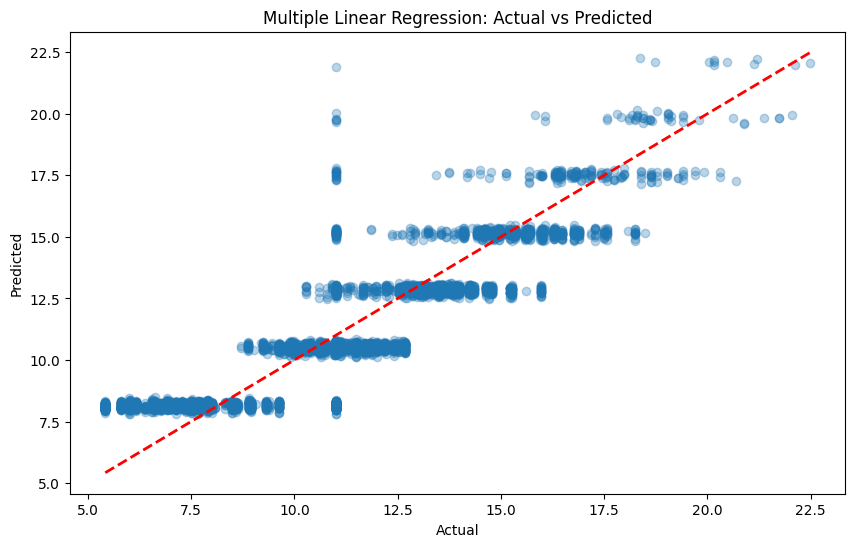

In [22]:
import matplotlib.pyplot as plt
y_pred  = model.predict(x_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()